In [13]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Change your path to correct script working
path = 'Deep learning/Cat_or_dog/'  # ~/(katalog domowy)/Deep learning/... 

path_train_cats = os.listdir(f'{path}/train/cats')  
path_train_dogs = os.listdir(f'{path}/train/dogs')  
path_validation_cats = os.listdir(f'{path}/validation/cats') 
path_validation_dogs = os.listdir(f'{path}/validation/dogs')

print("Liczba elementów zbioru uczącego: {}".format(len(path_train_cats)+len(path_train_dogs)))
print("Liczba elementów zbioru walidacyjnego: {}".format(len(path_validation_cats)+len(path_validation_dogs)))

Liczba elementów zbioru uczącego: 2000
Liczba elementów zbioru walidacyjnego: 1000


In [15]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255,
                                                                    rotation_range=20,
                                                                    width_shift_range=0.1,
                                                                    shear_range=0.3,
                                                                    zoom_range=0.3,
                                                                    horizontal_flip=True,
                                                                    fill_mode='nearest')
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_iterator = train_generator.flow_from_directory(
    f'{path}/train',
    target_size=(150, 150),
    batch_size=40,
    class_mode='binary')

validation_iterator = validation_generator.flow_from_directory(
    f'{path}/validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.compute_output_shape(input_shape=(None, 150, 150, 3))

TensorShape([Dimension(None), Dimension(128)])

In [19]:
model.add(tf.keras.layers.Dense(1, activation=None))
model.build(input_shape=(None, 150, 150, 3))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(train_iterator, validation_data=validation_iterator,
                    steps_per_epoch=50, epochs=30, validation_steps=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 32)       

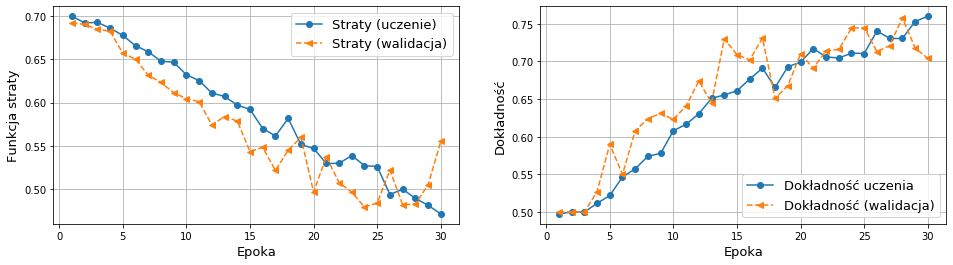

In [20]:
hist_end = hist.history
x_ar = np.arange(len(hist_end['loss'])) + 1
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1,2,1)
ax.plot(x_ar, hist_end['loss'], '-o', label='Straty (uczenie)')
ax.plot(x_ar, hist_end['val_loss'], '--<', label='Straty (walidacja)')
ax.legend(fontsize=13)
ax.set_xlabel('Epoka', size=13)
ax.set_ylabel('Funkcja straty', size=13)
ax.grid()

ax = fig.add_subplot(1,2,2)
ax.plot(x_ar, hist_end['acc'], '-o', label='Dokładność uczenia')
ax.plot(x_ar, hist_end['val_acc'], '--<', label='Dokładność (walidacja)')
ax.legend(fontsize=13)
ax.set_xlabel('Epoka', size=13)
ax.set_ylabel('Dokładność', size=13)
ax.grid()
plt.show()

fig.savefig(f'{path}results_v2.png', dpi=300)

In [23]:
with open(f'{path}modelsummary2.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))
